In [63]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the base directory containing all results
base_dir = 'results_to_plot'
output_dir = "results_PLOTS"
os.makedirs(output_dir, exist_ok=True)

# Initialize a dictionary to store the data in the format {(sub_goal, algorithm): [dataframes]}
data = {}

# Traverse the directory structure
for sub_goal in os.listdir(base_dir):
    sub_goal_path = os.path.join(base_dir, sub_goal)
    if os.path.isdir(sub_goal_path):
        for algorithm in os.listdir(sub_goal_path):
            algorithm_path = os.path.join(sub_goal_path, algorithm)
            if os.path.isdir(algorithm_path):
                # List to store each run's dataframe for this (sub_goal, algorithm) pair
                run_dataframes = []
                for run_file in os.listdir(algorithm_path):
                    run_file_path = os.path.join(algorithm_path, run_file)
                    if run_file_path.endswith('.csv'):
                        # Load the CSV file
                        df = pd.read_csv(run_file_path)
                        # Rename columns if necessary (based on your structure)
                        df.columns = ['Environment Step', 'Reward']
                        run_dataframes.append(df)

                # Store all runs for the specific (sub_goal, algorithm) pair
                data[(sub_goal, algorithm)] = run_dataframes
print('data', data)


data {('(1, 4)', 'q-learning'): [      Environment Step  Reward
0                    1    -1.0
1                    2    -1.1
2                    3    -2.1
3                    4    -3.1
4                    5    -3.2
...                ...     ...
4282              4283     1.4
4283              4284     1.3
4284              4285     1.2
4285              4286     1.1
4286              4287    51.1

[4287 rows x 2 columns],       Environment Step  Reward
0                    1    -1.0
1                    2    -1.1
2                    3    -2.1
3                    4    -2.2
4                    5    -2.3
...                ...     ...
5222              5223     7.8
5223              5224     7.7
5224              5225     7.6
5225              5226     7.5
5226              5227    57.5

[5227 rows x 2 columns],       Environment Step  Reward
0                    1    -1.0
1                    2    -1.1
2                    3    -2.1
3                    4    -3.1
4               

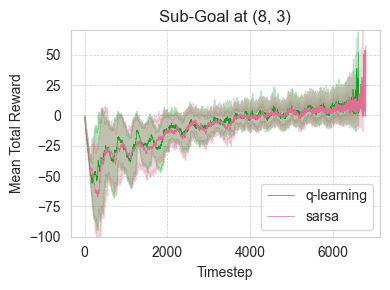

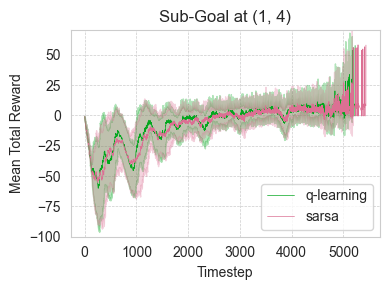

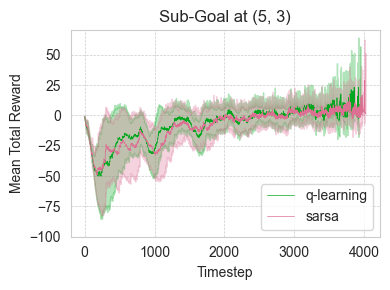

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

colors = {'q-learning': '#04A71F', 'sarsa': '#DB7093'}

# Initialize a dictionary to store the organized data for rewards and path lengths
mean_rewards_data = {}
mean_path_lengths_data = {}

# Assuming we have loaded and processed the data similarly to previous steps
sub_goals = set([sub_goal for sub_goal, algorithm in data.keys()])  # Get unique sub-goals

for sub_goal in sub_goals:
    fig, ax = plt.subplots(figsize=(4, 3))

    for algorithm in ['q-learning', 'sarsa']:
        if (sub_goal, algorithm) in data:  # Check if data exists for this (sub_goal, algorithm) pair
            # Calculate the mean and standard deviation across runs for each environment step for rewards
            all_rewards = pd.concat([df['Reward'] for df in data[(sub_goal, algorithm)]], axis=1)
            mean_rewards = all_rewards.mean(axis=1)
            std_rewards = all_rewards.std(axis=1)

            # Plot Mean Rewards with std as a shaded area for each algorithm
            episodes = mean_rewards.index
            ax.plot(episodes, mean_rewards, label=f"{algorithm}", color=colors[algorithm], linewidth=0.5)
            ax.fill_between(episodes, mean_rewards - std_rewards, mean_rewards + std_rewards,
                            color=colors[algorithm], alpha=0.3)

    ax.set_title(f"Sub-Goal at {sub_goal}")
    ax.set_xlabel("Timestep")
    ax.set_ylabel("Mean Total Reward")
    ax.set_ylim(-100, 70)
    ax.legend(loc='lower right')
    ax.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"sarsa_q__{sub_goal}_rewards.png"))
    plt.show()


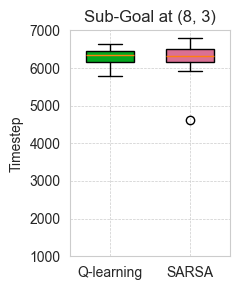

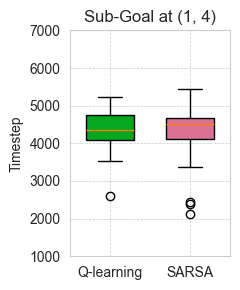

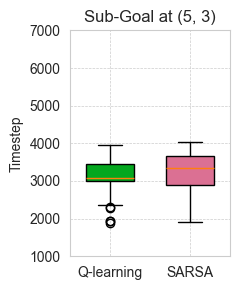

In [71]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define colors for each algorithm
colors = {'q-learning': '#04A71F', 'sarsa': '#DB7093'}

# Traverse each sub_goal and create boxplots for Q-learning and SARSA
for sub_goal in set([key[0] for key in data.keys()]):  # Get unique sub-goals from the data keys
    fig, ax = plt.subplots(figsize=(2.5, 3))

    # Collect last rewards for Q-learning and SARSA
    last_rewards = {}
    for algorithm in ['q-learning', 'sarsa']:
        if (sub_goal, algorithm) in data:
            # Extract the last reward of each run
            last_rewards[algorithm] = [df['Environment Step'].iloc[-1] for df in data[(sub_goal, algorithm)]]

    # Plot boxplots for each algorithm
    positions = [1, 2]  # Positions on the x-axis for Q-learning and SARSA
    for i, (alg, rewards) in enumerate(last_rewards.items()):
        ax.boxplot(rewards, positions=[positions[i]], widths=0.6, patch_artist=True,
                   boxprops=dict(facecolor=colors[alg]))

    # Customize the plot
    ax.set_xticks(positions)
    ax.set_xticklabels(['Q-learning', 'SARSA'])
    ax.set_ylabel('Timestep')
    ax.set_ylim(1000, 7000)
    ax.set_title(f'Sub-Goal at {sub_goal}')
    ax.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"sarsa_q__{sub_goal}_boxplot.png"))

    plt.show()




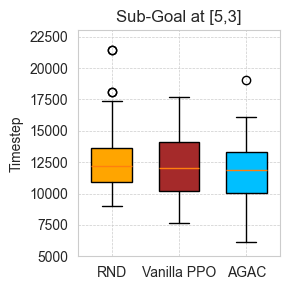

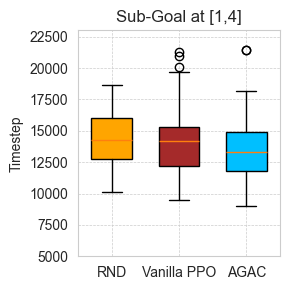

In [75]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the directory containing all CSV files
base_dir = 'results_sim'

# Define colors for each algorithm
colors = {'RND': '#FFA500', 'AGAC': '#00BFFF', 'Vanilla PPO': '#A52A2A'}

# Initialize a list to store data from each file
data_list = []

# Load each CSV file in the directory
for file_name in os.listdir(base_dir):
    if file_name.endswith('.csv'):
        file_path = os.path.join(base_dir, file_name)
        df = pd.read_csv(file_path)
        data_list.append(df)

# Concatenate all data into a single DataFrame
data2 = pd.concat(data_list, ignore_index=True)

# Get unique sub-goal positions
sub_goals = data2['custom_sub_goal_pos'].unique()

# Create boxplots for each sub-goal position
for sub_goal in sub_goals:
    fig, ax = plt.subplots(figsize=(3, 3))

    # Collect data for each algorithm
    box_data = []
    box_colors = []
    labels = []
    for algorithm in ['RND', 'Vanilla PPO', 'AGAC']:
        # Filter data by sub-goal and algorithm
        filtered_data = data2[(data2['custom_sub_goal_pos'] == sub_goal) &
                             (data2['exploration_algorithm'] == algorithm)]
        # Collect the 'Environment Steps' for this sub-goal and algorithm
        if not filtered_data.empty:
            box_data.append(filtered_data['Environment Steps'])
            box_colors.append(colors.get(algorithm, 'grey'))
            labels.append(algorithm)

    # Create boxplot with colors for each algorithm
    box = ax.boxplot(box_data, patch_artist=True, widths=0.6)

    # Set colors for each boxplot
    for patch, color in zip(box['boxes'], box_colors):
        patch.set_facecolor(color)

    # Customize plot
    ax.set_xticks(range(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_title(f'Sub-Goal at {sub_goal}')
    ax.set_ylim(5000, 23000)
    ax.set_ylabel('Timestep')
    ax.grid(True, linestyle='--', linewidth=0.5)

    # Save the plot as an image
    # plt.savefig(os.path.join(output_dir, f"ppo__{sub_goal}_boxplot.png"))
    plt.tight_layout()
    plt.show()


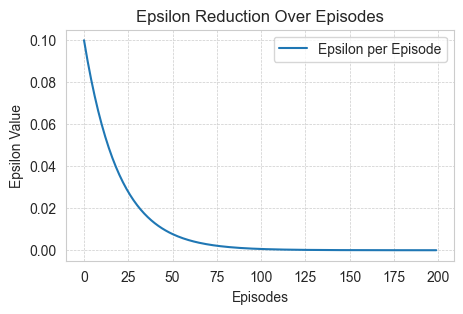

In [78]:
# Parameters: SHOW epsilon reduction
initial_epsilon = 0.1
episodes = 200
reduction_factor = 0.95

# Track epsilon values over episodes
epsilon_values = []
epsilon = initial_epsilon

for episode in range(episodes):
    epsilon_values.append(epsilon)
    epsilon *= reduction_factor

# Plotting
plt.figure(figsize=(5, 3))
plt.plot(range(episodes), epsilon_values, label='Epsilon per Episode')
plt.title('Epsilon Reduction Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Epsilon Value')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.show()